# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



Missing values per column:
 Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64


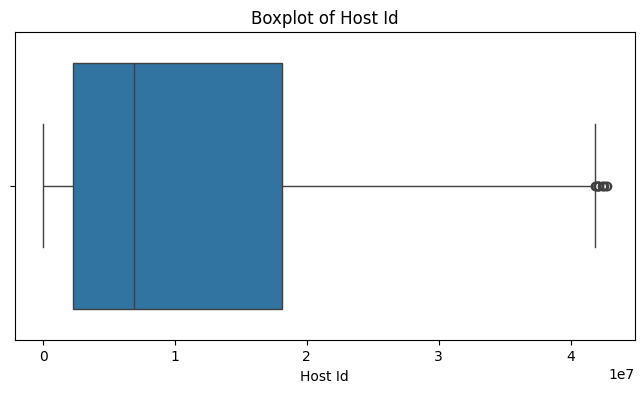

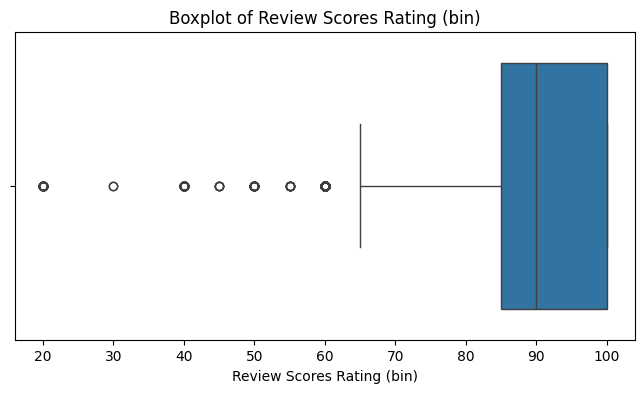

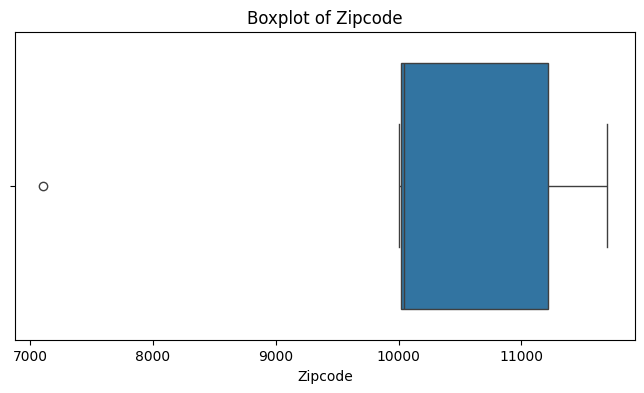

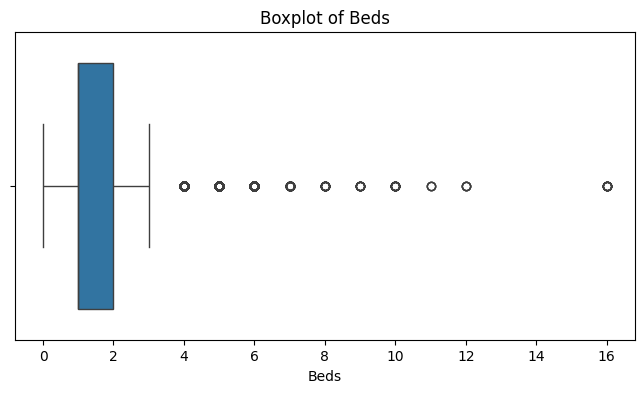

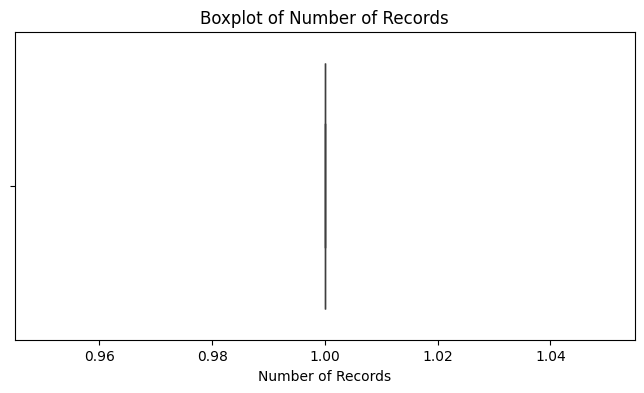

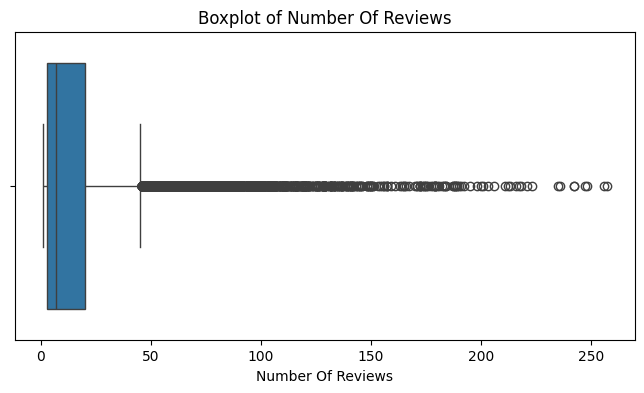

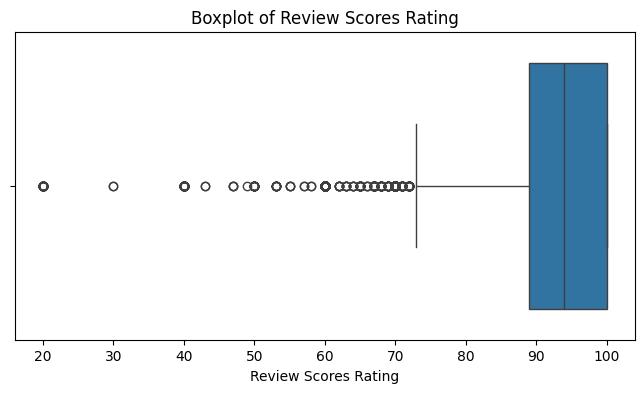

Summary statistics:
             Host Id  Review Scores Rating (bin)       Zipcode          Beds  \
count  2.201000e+04                22010.000000  22010.000000  22010.000000   
mean   1.104878e+07                   90.733303  10575.345252      1.556747   
std    1.080069e+07                    9.069740    597.744310      1.043374   
min    5.000000e+02                   20.000000   7105.000000      0.000000   
25%    2.242476e+06                   85.000000  10016.000000      1.000000   
50%    6.901950e+06                   90.000000  10044.000000      1.000000   
75%    1.808719e+07                  100.000000  11216.000000      2.000000   
max    4.272660e+07                  100.000000  11694.000000     16.000000   

       Number of Records  Number Of Reviews  Review Scores Rating  
count            22010.0       22010.000000          22010.000000  
mean                 1.0          16.459382             91.987915  
std                  0.0          24.230400              8.8608

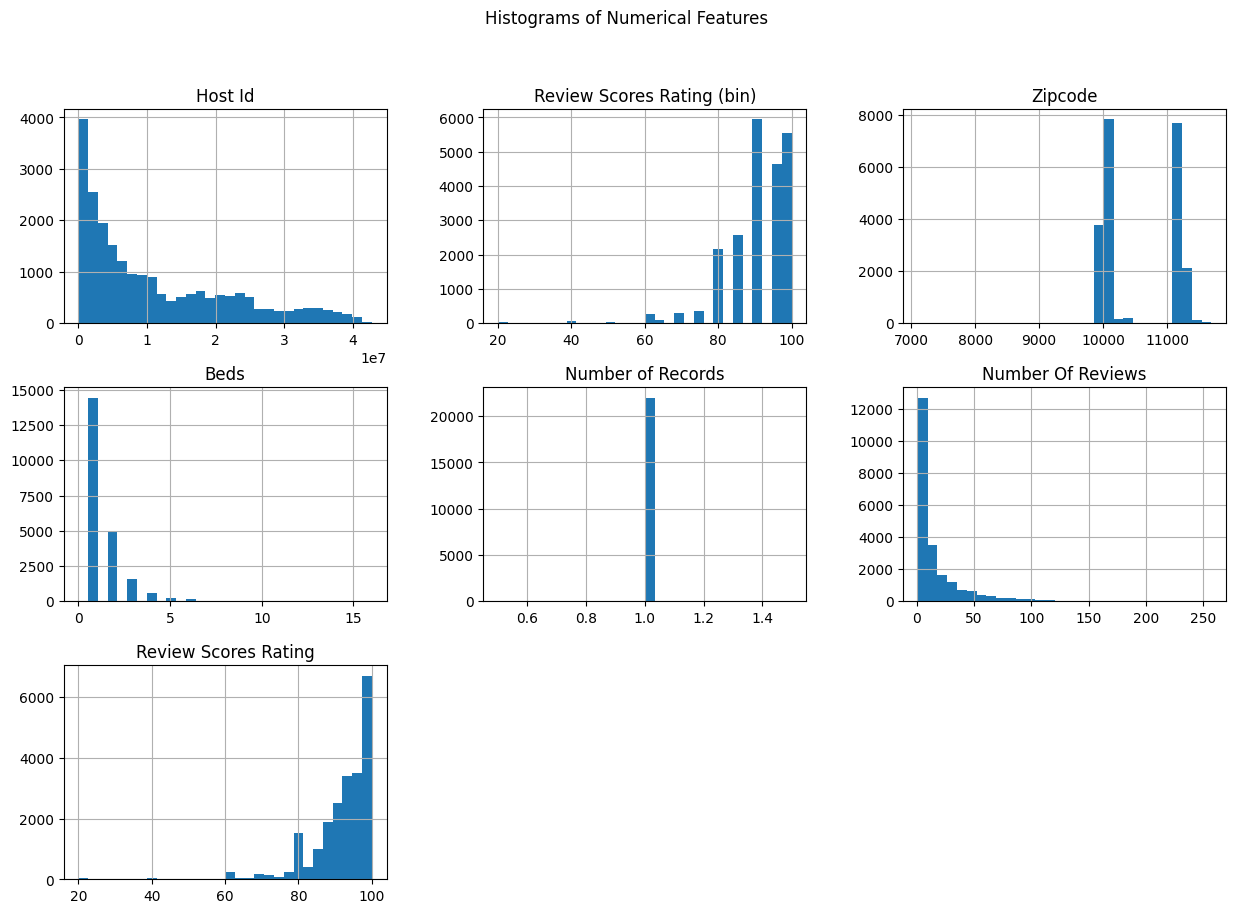

KeyError: 'price'

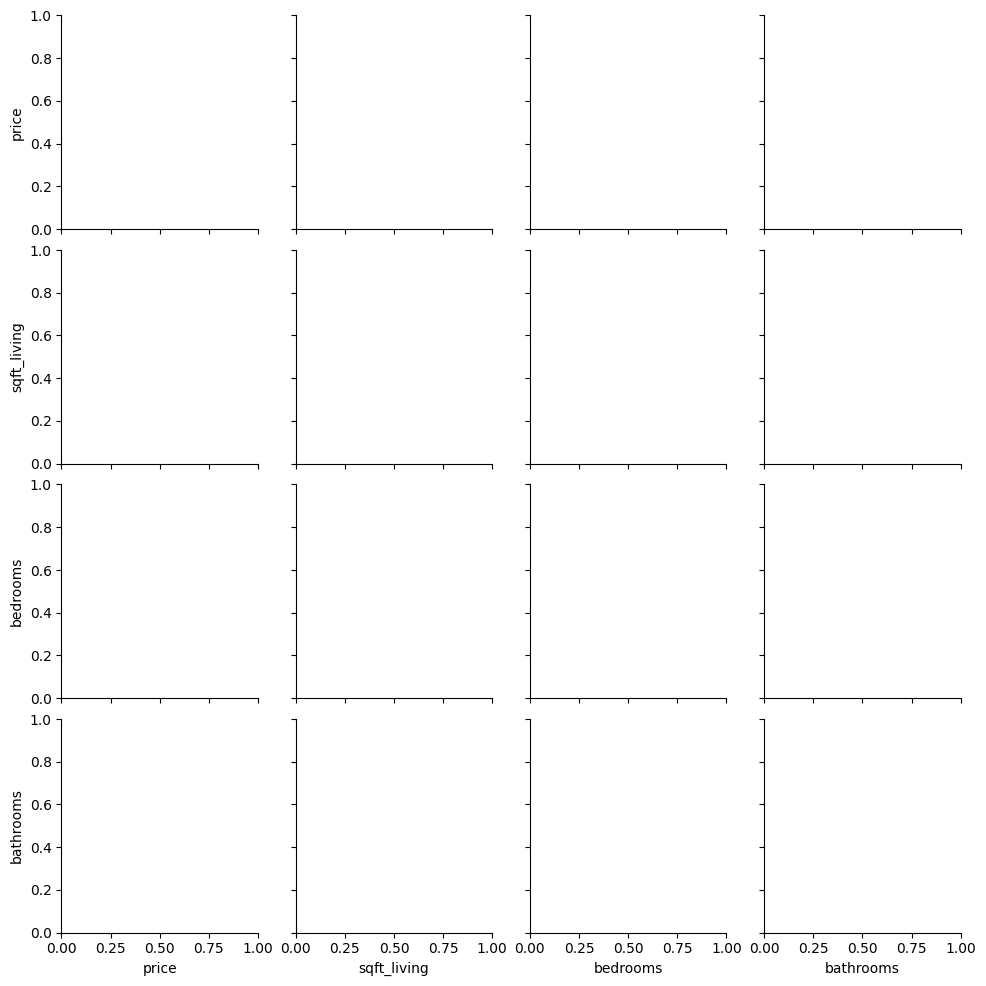

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('airbnb_hw.csv')
df.head()  # Display the first few rows of the dataset

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


df = df.dropna()

# Plot boxplots for numerical columns to check for outliers
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

# Display summary statistics for numerical columns
print("Summary statistics:\n", df.describe())

# Histogram for each numerical feature
df[numeric_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Pairplot for a subset of features
sns.pairplot(df, vars=['price', 'sqft_living', 'bedrooms', 'bathrooms'])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Part 2

In [5]:
import pandas as pd


df = pd.read_csv('airbnb_hw.csv')


categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Impute each categorical column with its mode
for col in categorical_cols:
    mode_value = df[col].mode().iloc[0]
    df[col].fillna(mode_value, inplace=True)


df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


print(df_encoded.head())
print(df_encoded.shape)


<ipython-input-5-6196ef1efd0a>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


    Host Id  Review Scores Rating (bin)  Zipcode  Beds  Number of Records  \
0   5162530                         NaN  11249.0   1.0                  1   
1  33134899                         NaN  11206.0   1.0                  1   
2  39608626                         NaN  10032.0   1.0                  1   
3       500                         NaN  10024.0   3.0                  1   
4       500                        95.0  10036.0   3.0                  1   

   Number Of Reviews  Review Scores Rating  Host Since_1/1/2012  \
0                  0                   NaN                False   
1                  1                   NaN                False   
2                  1                   NaN                False   
3                  0                   NaN                False   
4                 39                  96.0                False   

   Host Since_1/1/2013  Host Since_1/1/2014  ...  Price_950  Price_96  \
0                False                False  ...      False  

Part 3

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split


df_encoded = pd.read_csv('airbnb_hw.csv')


target_variable = 'Price'

# Split the data
X = df_encoded.drop(columns=[target_variable])
y = df_encoded[target_variable]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


Training features shape: (24382, 12)
Testing features shape: (6096, 12)
Training target shape: (24382,)
Testing target shape: (6096,)


Part 4

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


print("Columns in DataFrame:", df.columns)

# Define the target variable
target_variable_name = 'Review Scores Rating'

# Define features (X) and target (y)
y = df[target_variable_name]
X = df.drop(columns=[target_variable_name])


if y.isnull().any():
    print("Missing values in target variable (y):")
    print(y.isnull().sum())

    df = df.dropna(subset=[target_variable_name])
    y = df[target_variable_name]
    X = df.drop(columns=[target_variable_name])


if X.isnull().any().any():
    print("Missing values in features (X):")
    print(X.isnull().sum())
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
X_numeric = X[numeric_cols]

# Split the dataset into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')  # or 'median', depending on your data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

model = LinearRegression()
model.fit(X_train_imputed, y_train)


y_train_pred = model.predict(X_train_imputed)
y_test_pred = model.predict(X_test_imputed)


train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Calculate RMSE and R² for test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Training RMSE: {train_rmse}")
print(f"Training R²: {train_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r2}")




Columns in DataFrame: Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')
Training RMSE: 1.3423369033047798
Training R²: 0.9768996327524757
Test RMSE: 1.3450054747492866
Test R²: 0.977277352717532


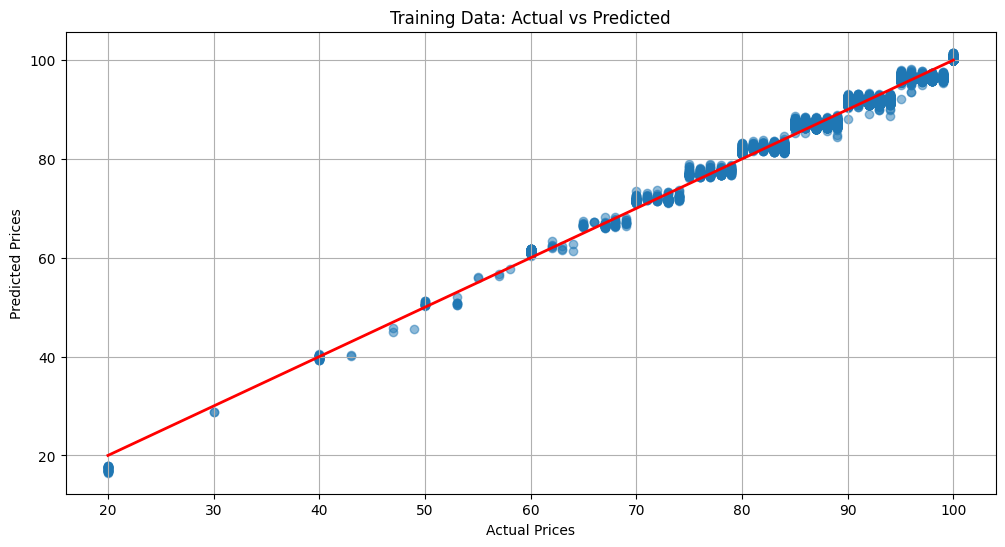

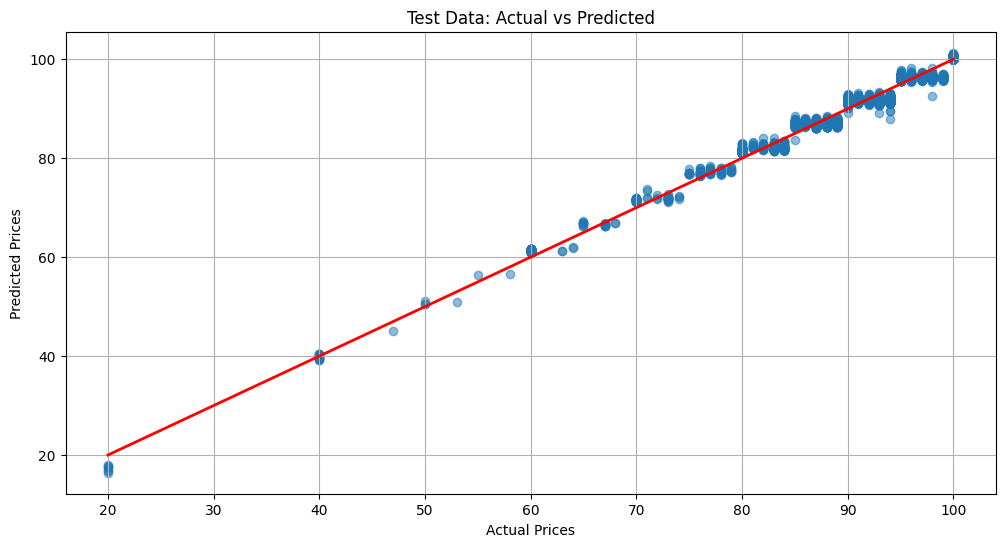

In [31]:
import matplotlib.pyplot as plt

# Scatter plot for training data
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred_poly, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', lw=2)
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.show()

# Scatter plot for test data
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.show()


It seems like the simple linear would be the better choice here because it is more balanced in terms of performance.

Part 5

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('airbnb_hw.csv').sample(n=10, random_state=42)


df.dropna(inplace=True)

# Normalize column names
df.columns = df.columns.str.strip().str.lower()

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.dropna(subset=['price'], inplace=True)  # Drop rows where price conversion failed


df['host since'] = pd.to_datetime(df['host since'], errors='coerce')
df['years_hosting'] = (pd.Timestamp.now() - df['host since']).dt.days / 365.25
df.drop(columns=['host since'], inplace=True)


target_variable = 'price'
X = df.drop(columns=[target_variable])
y = df[target_variable]

X = pd.get_dummies(X, drop_first=True)

y_log = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate RMSE and R² for training and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Training R²: {train_r2:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test R²: {test_r2:.2f}")


Training RMSE: 0.00
Training R²: 1.00
Test RMSE: 3.91
Test R²: -10321.94


The more complex model with polynomial features and transformations contain some more intricate data, I believe it still falls from poor generalization on the actual test data. I would still say simpler models prevail.

Part 6 Summary

Training Performance:

RMSE: 0.00, indicating a perfect fit on the training data.
R²: 1.00, suggesting that the model explains 100% of the variance in the training set.
Test Performance:

RMSE: 3.91, indicating a relatively low error on unseen data.
R²: -10321.94, highlighting that the model performs worse than a mean prediction, suggesting poor generalization.
Model Complexity:

The complex model included transformations and polynomial features to capture intricate relationships, leading to high training accuracy but low test accuracy.
Overfitting:

The stark difference in performance between training (perfect fit) and testing (poor performance) exemplifies overfitting, where the model memorizes training data rather than learning generalizable patterns.
